In [17]:
!pip install git+https://github.com/EnzymeML/PyEnzyme.git@pysces_simulation

  Cloning https://github.com/EnzymeML/PyEnzyme.git (to revision pysces_simulation) to /private/var/folders/0f/gvqwxk9d46z_cz6w3zg6yn1m0000gn/T/pip-req-build-gan5_wua
  Running command git clone -q https://github.com/EnzymeML/PyEnzyme.git /private/var/folders/0f/gvqwxk9d46z_cz6w3zg6yn1m0000gn/T/pip-req-build-gan5_wua
  Running command git checkout -b pysces_simulation --track origin/pysces_simulation
  Switched to a new branch 'pysces_simulation'
  Branch 'pysces_simulation' set up to track remote branch 'pysces_simulation' from 'origin'.
  Resolved https://github.com/EnzymeML/PyEnzyme.git to commit c1d03d53ceeeb98c0f50bcc4504c4c81b8c37e0c
  Created wheel for PyEnzyme: filename=PyEnzyme-1.1.3-py3-none-any.whl size=118163 sha256=db4348b5b75240dd04ee566302a0d6654288348156de4a172583bd558a70604a
  Stored in directory: /private/var/folders/0f/gvqwxk9d46z_cz6w3zg6yn1m0000gn/T/pip-ephem-wheel-cache-51k44ymv/wheels/c0/d2/79/892773bada6ed08e026443201a499668d900bf7645a539ba67
Successfully built P

In [34]:
import pyenzyme as pe

## Creating an EnzymeML document

In [35]:
enzmldoc = pe.EnzymeMLDocument(name="Alcohol formation")

In [36]:
# Add Vessel
vessel = pe.Vessel(name="Tube", volume=10, unit="ml")
vessel_id = enzmldoc.addVessel(vessel)

In [37]:
# Add reactants
pyruvate = pe.Reactant.fromChebiID(
    chebi_id="CHEBI:15361", vessel_id=vessel_id,
    init_conc=10.0, unit="mmole / l"
)

acetald = pe.Reactant.fromChebiID(
    chebi_id="CHEBI:15343", vessel_id=vessel_id,
    init_conc=0.0, unit="mmole / l"
)

acetald_id = enzmldoc.addReactant(acetald)

ethanol = pe.Reactant.fromChebiID(
    chebi_id="CHEBI:16236", vessel_id=vessel_id,
    init_conc=0.0, unit="mmole / l"
)

pyruvate_id = enzmldoc.addReactant(pyruvate)
ethanol_id = enzmldoc.addReactant(ethanol)
acetald_id = enzmldoc.addReactant(acetald)

In [38]:
# Add Enzymes
pdc = pe.Protein.fromUniProtID(
    uniprotid="P11498", vessel_id=vessel_id,
    init_conc=10.0, unit="fmole / l"
)

adh = pe.Protein.fromUniProtID(
    uniprotid="P00330", vessel_id=vessel_id,
    init_conc=20.0, unit="fmole / l"
)

pdc_id = enzmldoc.addProtein(pdc)
adh_id = enzmldoc.addProtein(adh)

In [39]:
# Create reactions
reaction_1 = pe.EnzymeReaction.fromEquation(
    "pyruvate -> acetaldehyde", "Pyruvate Decarboxylation",
    modifiers=[pdc_id], enzmldoc=enzmldoc
)

reaction_2 = pe.EnzymeReaction.fromEquation(
    "acetaldehyde -> ethanol", "Ethanol formation",
    modifiers=[adh_id], enzmldoc=enzmldoc
)

In [40]:
# Add models to the reactions to generate simulation data
r_1_model = pe.KineticModel.fromEquation(
    "Irreversible Michaelis-Menten",
    "kcat * Pyruvic carboxylase * pyruvate / (pyruvate + Km)",
    enzmldoc=enzmldoc
)

r_1_model._kcat.value = 5.0
r_1_model._kcat.unit = "1/min"
r_1_model._Km.value = 20.0
r_1_model._Km.unit = "mmole / l"

r_2_model = pe.KineticModel.fromEquation(
    "Irreversible Michaelis-Menten",
    "kcat * YADH-1 * acetaldehyde / (acetaldehyde + Km)",
    enzmldoc=enzmldoc
)

r_2_model._kcat.value = 3.0
r_2_model._kcat.unit = "1/min"
r_2_model._Km.value = 50.0
r_2_model._Km.unit = "mmole / l"

# Assign models
reaction_1.model = r_1_model
reaction_2.model = r_2_model

In [41]:
# Add reactions to the document
enzmldoc.addReactions([reaction_1, reaction_2])

{'Pyruvate Decarboxylation': 'r0', 'Ethanol formation': 'r1'}

In [42]:
enzmldoc.exportKineticParameters()

,name,value,unit,initial_value,upper,lower,is_global,stdev,constant
reaction,,,,,,,,,
r0,Km,20.0,mmole / l,None,None,None,False,None,False
r0,kcat,5.0,1 / min,None,None,None,False,None,False
r1,Km,50.0,mmole / l,None,None,None,False,None,False
r1,kcat,3.0,1 / min,None,None,None,False,None,False


In [43]:
enzmldoc.toFile(".", "Ethanol_Formation_Base")


Archive was written to ./Ethanol_Formation_Base.omex



## Simulation

In [44]:
from pyenzyme.thinlayers import ThinLayerPysces

In [45]:
# Initialize the thin layer
thin_layer = ThinLayerPysces(
    "Ethanol_Formation_Base.omex",
    model_dir="PySCeS"
)

Check SBML support is at action level 2
SBML file is L3V2



*********ERRORS***********


*********ERRORS***********


Possible errors detected in SBML conversion, Model may be incomplete. Please check the error log file "Alcohol_formation.xml-sbml_conversion_errors.txt" for details.


*******************************************************************
Issues encountered in SBML translation (model processed anyway)
SBML source: PySCeS/Alcohol_formation.xml
*******************************************************************

Parameter units ignored for (local) parameters:
['Km', 'kcat'] 

*******************************************************************

Info: single compartment model: locating "r0" in default compartment
Info: single compartment model: locating "r1" in default compartment
Writing file: PySCeS/Alcohol_formation.xml.psc

SBML2PSC
in : PySCeS/Alcohol_formation.xml
out: PySCeS/Alcohol_formation.xml.psc
Assuming extension is .psc
Using model directory: PySCeS
PySCeS/Alcoh

In [46]:
enzmldoc.printDocument()

Alcohol formation
>>> Reactants
	ID: s0 	 Name: acetaldehyde
	ID: s1 	 Name: pyruvate
	ID: s2 	 Name: ethanol
	ID: s3 	 Name: acetaldehyde
>>> Proteins
	ID: p0 	 Name: Pyruvic carboxylase
	ID: p1 	 Name: YADH-1
>>> Complexes
>>> Reactions
	ID: r0 	 Name: Pyruvate Decarboxylation
	ID: r1 	 Name: Ethanol formation


In [47]:
# Create simulation inputs
inits = [
    dict(time=list(range(0,60,10)), s0=10.0, s1=0.00, s2=0.00, s3=0.00),
    dict(time=list(range(0,60,10)), s0=20.0, s1=0.00, s2=0.00, s3=0.00),
    dict(time=list(range(0,60,10)), s0=30.0, s1=0.00, s2=0.00, s3=0.00),
    dict(time=list(range(0,60,10)), s0=50.0, s1=0.00, s2=0.00, s3=0.00),
    dict(time=list(range(0,60,10)), s0=100.0, s1=0.00, s2=0.00, s3=0.00),
]

for init in inits:
    
    meas = pe.Measurement(
        name=f"s0_{init['s0']}", global_time=init["time"],
        global_time_unit="mins"
    )
    
    meas.addData(reactant_id="s0", init_conc=init["s0"], unit="mmole / l")
    meas.addData(reactant_id="s1", init_conc=init["s1"], unit="mmole / l")
    meas.addData(reactant_id="s2", init_conc=init["s2"], unit="mmole / l")
    meas.addData(reactant_id="s3", init_conc=init["s3"], unit="mmole / l")
    
    data = thin_layer.simulate(**init)
    
    repl = pe.Replicate(
        id=f"repl_s0_{init['s0']}", species_id="s0",
        data_unit="mmole / l", time_unit="mins",
        data = data.s0.to_list(), time=init["time"]
    )
    
    meas.addReplicates(repl, enzmldoc=enzmldoc)
    
    enzmldoc.addMeasurement(meas)

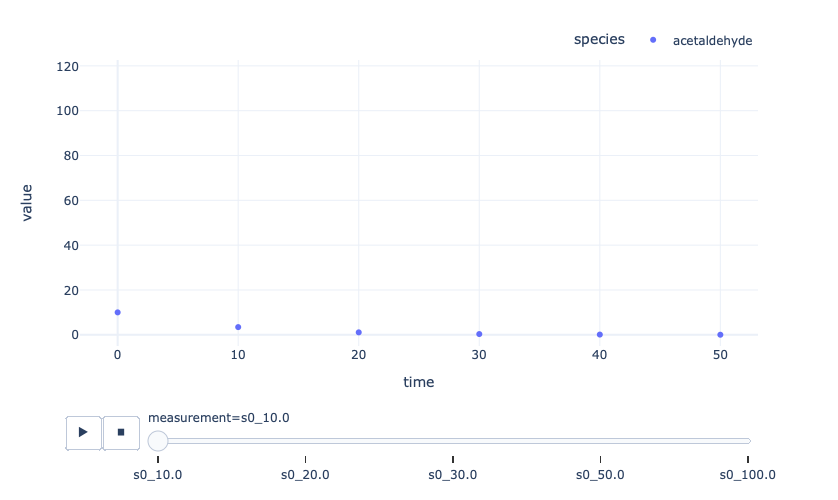

In [48]:
enzmldoc.visualize(interactive=True, use_names=True)

In [49]:
# Finally, save it to a file
enzmldoc.toFile(".", "Ethanol_Formation_Simulated")


Archive was written to ./Ethanol_Formation_Simulated.omex

